In [1]:
'''Code for fine-tuning Inception V3 for a new task.

Start with Inception V3 network, not including last fully connected layers.

Train a simple fully connected layer on top of these.


'''

import numpy as np
import pandas as pd
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout
import keras.applications.inception_v3 as inception
import cnn_d as OurNetwork
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
IMSIZE = (196, 196)

PHOTO_PATH = r"\\devmachine\e$\data\katkam-secret-location\katkam-scaled"

def showImg(filename):
    img = image.load_img(PHOTO_PATH+"/"+filename, target_size=IMSIZE)
    x = image.img_to_array(img)
    plt.imshow(img)
    plt.show()

Using TensorFlow backend.


In [86]:
cleaned_data = pd.read_csv("cleaned_data.csv")
weather_array = list(map(lambda x:x.split(',') ,cleaned_data["Mapped"].values))
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(weather_array)
cleaned_data["Y"] = list(Y)
# print(mlb.inverse_transform(np.array([0,1,0,0,0])))
cleaned_data
print(mlb.classes_)
# mlb.inverse_transform(Y)

['Clear' 'Cloudy' 'Fog' 'Rain' 'Snow']


[('Clear',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Clear',),
 ('Cloudy',),
 ('Clear',),
 ('Clear',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy', 'Rain'),
 ('Cloudy',),
 ('Cloudy',),
 ('Clear',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Clear',),
 ('Cloudy',),
 ('Clear',),
 ('Cloudy', 'Rain'),
 ('Cloudy', 'Rain'),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Clear',),
 ('Cloudy',),
 ('Cloudy',),
 ('Clear',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy', 'Rain'),
 ('Cloudy',),
 ('Cloudy', 'Rain'),
 ('Cloudy', 'Rain'),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Clear',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy', 'Rain'),
 ('Cloudy', 'Rain'),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy', 'Rain'),
 ('Cloudy',),
 ('Cloudy',),
 ('Clear',),
 ('Clear',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Cloudy',),
 ('Clear',),
 ('Clear',),

In [3]:
cleaned_data[cleaned_data.apply(lambda x: x["Y"][2]==1,axis = 1)]

,Date/Time,Year,Month,Day,Time_x,Filename,Mapped,Weather,Y
112,2016-06-23 08:00:00,2016,6,23,08:00,katkam-20160623080000.jpg,"Rain,Cloudy,Fog","Rain,Fog","[0, 1, 1, 1, 0]"
113,2016-06-23 09:00:00,2016,6,23,09:00,katkam-20160623090000.jpg,"Rain,Cloudy,Fog","Rain,Fog","[0, 1, 1, 1, 0]"
200,2016-07-09 06:00:00,2016,7,9,06:00,katkam-20160709060000.jpg,"Rain,Cloudy,Fog","Rain Showers,Fog","[0, 1, 1, 1, 0]"
332,2016-08-03 06:00:00,2016,8,3,06:00,katkam-20160803060000.jpg,Fog,Fog,"[0, 0, 1, 0, 0]"
359,2016-08-09 07:00:00,2016,8,9,07:00,katkam-20160809070000.jpg,"Rain,Cloudy,Fog","Rain,Fog","[0, 1, 1, 1, 0]"
360,2016-08-09 08:00:00,2016,8,9,08:00,katkam-20160809080000.jpg,"Rain,Cloudy,Fog","Rain,Fog","[0, 1, 1, 1, 0]"
361,2016-08-09 10:00:00,2016,8,9,10:00,katkam-20160809100000.jpg,"Rain,Cloudy,Fog","Drizzle,Fog","[0, 1, 1, 1, 0]"
362,2016-08-09 11:00:00,2016,8,9,11:00,katkam-20160809110000.jpg,Fog,Fog,"[0, 0, 1, 0, 0]"
450,2016-08-29 06:00:00,2016,8,29,06:00,katkam-20160829060000.jpg,Fog,Fog,"[0, 0, 1, 0, 0]"
451,2016-08-29 07:00:00,2016,8,29,07:00,katkam-20160829070000.jpg,Fog,Fog,"[0, 0, 1, 0, 0]"


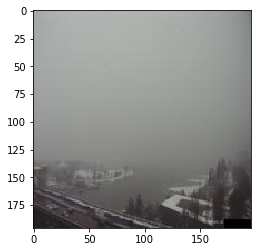

In [4]:
showImg("katkam-20161209130000.jpg")

In [5]:
#
def balance_data (df):
    clear_days_mask = df.apply(lambda x: x["Y"][0]==1,axis = 1)
    clear_days = df[clear_days_mask]
    non_clear_days = df[~clear_days_mask].sample(len(clear_days))
    final_data = clear_days.append(non_clear_days)
    final_data["Y2"] = cleaned_data.apply(lambda x: [x["Y"][0],(x["Y"][0]+1)%2],axis = 1)
    final_data = final_data.sample(frac=1)
    return final_data
final_data = balance_data(cleaned_data)

In [6]:
def sub_balanced_data(df):
    foggy_days  = cleaned_data[cleaned_data.apply(lambda x: x["Y"][2]==1,axis = 1)]
    rainy_days  = cleaned_data[cleaned_data.apply(lambda x: x["Y"][3]==1,axis = 1)]
    snowy_days  = cleaned_data[cleaned_data.apply(lambda x: x["Y"][4]==1,axis = 1)]
    just_cloudy_days  = cleaned_data[cleaned_data.apply(lambda x: (x["Y"][2]==0) and (x["Y"][3]==0) and (x["Y"][4]==0),axis = 1)]
    samples_per_label = len(snowy_days)
    final_data = foggy_days.sample(samples_per_label).append(rainy_days.sample(samples_per_label))
    final_data = final_data.append(snowy_days.sample(samples_per_label))
    final_data = final_data.append(just_cloudy_days.sample(samples_per_label))
    return final_data
# cleaned_data["Y3"] = cleaned_data.apply(lambda x: x["Y"],axis = 1)
cleaned_data["Y2"] = cleaned_data.apply(lambda x: [x["Y"][0],(x["Y"][0]+1)%2],axis = 1)
cleaned_data["Y3"] = cleaned_data.apply(lambda x: list(x["Y"])[2:5],axis = 1)
final_data = sub_balanced_data(cleaned_data)
train_test_mask = np.random.rand(len(final_data)) < 0.8
train_data = final_data[train_test_mask]
test_data = final_data[~train_test_mask]

In [7]:
# train_test_mask = np.random.rand(len(final_data)) < 0.8
# train_data = final_data[train_test_mask]
# test_data = final_data[~train_test_mask]
# test_data

In [8]:
# base_model = inception.InceptionV3(weights='imagenet')
# # Turn off training on base model layers
# for layer in base_model.layers:
#     layer.trainable = False
# # k=base_model.get_layer('flatten').output
# # Add on new fully connected layers for the output classes.
# x = Dense(1024, activation='relu')(base_model.get_layer('block3_pool').output)
# x = Dropout(0.5)(x)
# predictions = Dense(2, activation='softmax', name='predictions')(x)

# model = Model(inputs=base_model.input, outputs=predictions)

# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [9]:
# Start with an Inception V3 model, not including the final softmax layer.
base_model = OurNetwork.network(classes = 2)
for layer in base_model.layers:
    layer.trainable = False
x = Flatten(name='sub_flatten')(base_model.get_layer('block3_pool').output)
x = Dense(64, activation='relu', name='sub_fc1')(x)
x = Dropout(0.3)(x)
sub_predictions = Dense(3, activation='sigmoid', name='sub_predictions')(x)
predictions = (base_model.get_layer('predictions').output)
model = Model(inputs=base_model.input, outputs=[predictions, sub_predictions])
# optimizer = optimizers.SGD(lr=0.005, momentum=0.1, decay=0.0, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer="adam", loss_weights={'predictions': 0, 'sub_predictions': 1}, metrics=['accuracy'])
# model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

# print ('Loaded Inception model')

print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 196, 196, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Conv2D)            (None, 196, 196, 16)  448         input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Conv2D)            (None, 196, 196, 16)  2320        block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 98, 98, 16)    0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [10]:

#print(val_files)
# np.random.seed(0)
img_datagen = ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2)

def my_load_img(img_path,img_datagen,size):
    img = image.load_img(img_path, target_size=size)
    x = image.img_to_array(img)
    x = img_datagen.random_transform(x)
    x = img_datagen.standardize(x)
    return x
def my_img_generator(df,img_datagen,batch_size):
#     index_array = np.random.permutation(len(files))
    
    index = 0
    count = 0
    img_datas=[]
    img_labels=[]
    img_sub_labels =[]
    while 1:
        # create numpy arrays of input data
        # and labels, from each line in the file
        item = df.iloc[index]
        if count < batch_size:
            img_datas.append(my_load_img(PHOTO_PATH+"/"+item["Filename"],img_datagen,IMSIZE))
#             [np.array(one_hot_labels),np.array(img_bboxes)]
            img_labels.append(item["Y2"])
            img_sub_labels.append(item["Y3"])

#             img_labels.append([np.array(item["Y2"]),np.array(item["Y3"])])

            index=(index+1)%df.shape[0]
            count+=1
        else:
            count=0
            yield (np.array(img_datas),[np.array(img_labels),np.array(img_sub_labels)])
                # yield (np.array(img_datas),np.array(img_bboxes))
#             else:
#                 yield (np.array(img_datas),np.array(one_hot_labels))
            img_datas = []
            img_labels = []
            img_sub_labels =[]
            img_bboxes=[]
#             random.shuffle(files)
            

batch_size=128
# t = next(my_img_generator(train_files,img_datagen,batch_size))

# model.load_weights('catdog_pretrain_nf.h5') 
# train_data
# train_data.shape
my_train_generator = my_img_generator(train_data,img_datagen,batch_size)
my_test_generator = my_img_generator(test_data,img_datagen,batch_size)
# next(my_train_generator)[1][0]
# train_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(
#         r'E:\workshare\Mind\A3\data\catdog',  # this is the target directory
#         target_size=IMSIZE,  # all images will be resized to 299x299 Inception V3 input
#         batch_size=batch_size,
#         class_mode='categorical')

#test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#         test_dir,  # this is the target directory
#         target_size=IMSIZE,  # all images will be resized to 299x299 Inception V3 input
#         batch_size=batch_size,
#         class_mode='categorical')
# train_data.shape
# print(next(train_generator)[1])
# print(next(my_train_generator)[1])

# print(a[1].shape)
# print(a[1])

In [11]:

model.load_weights('sub_cnn_b.h5',by_name=True)
# model.save_weights('cnn_c.h5') 

for i in range(1):
    '''Refresh data'''
    final_data = sub_balanced_data(cleaned_data)
    train_test_mask = np.random.rand(len(final_data)) < 0.8
    train_data = final_data[train_test_mask]
    test_data = final_data[~train_test_mask]
    my_train_generator = my_img_generator(train_data,img_datagen,batch_size)
    my_test_generator = my_img_generator(test_data,img_datagen,batch_size)
    
    model.fit_generator(
            my_train_generator,
            steps_per_epoch = 5,
            epochs = 10,
            validation_data = my_test_generator,
            verbose = 2,
            validation_steps = 5)
    model.save_weights('sub_cnn_b.h5') 


Epoch 1/10
29s - loss: 0.2719 - predictions_loss: 0.0730 - sub_predictions_loss: 0.2719 - predictions_acc: 0.9633 - sub_predictions_acc: 0.8813 - val_loss: 0.2099 - val_predictions_loss: 0.0083 - val_sub_predictions_loss: 0.2099 - val_predictions_acc: 0.9984 - val_sub_predictions_acc: 0.8948
Epoch 2/10
11s - loss: 0.2562 - predictions_loss: 0.0751 - sub_predictions_loss: 0.2562 - predictions_acc: 0.9641 - sub_predictions_acc: 0.8859 - val_loss: 0.2220 - val_predictions_loss: 0.0127 - val_sub_predictions_loss: 0.2220 - val_predictions_acc: 0.9969 - val_sub_predictions_acc: 0.8932
Epoch 3/10
10s - loss: 0.2665 - predictions_loss: 0.0593 - sub_predictions_loss: 0.2665 - predictions_acc: 0.9719 - sub_predictions_acc: 0.8813 - val_loss: 0.2164 - val_predictions_loss: 0.0130 - val_sub_predictions_loss: 0.2164 - val_predictions_acc: 0.9984 - val_sub_predictions_acc: 0.8922
Epoch 4/10
9s - loss: 0.2612 - predictions_loss: 0.0648 - sub_predictions_loss: 0.2612 - predictions_acc: 0.9672 - sub_pr

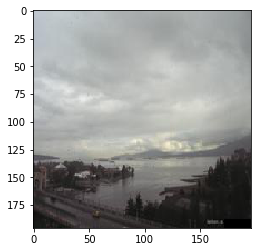

Predicted: [array([[  7.62883064e-06,   9.99992251e-01]], dtype=float32), array([[  5.83123619e-06,   4.11033869e-01,   4.07253780e-15]], dtype=float32)]


In [232]:
img_path = PHOTO_PATH+"/"+"katkam-20170513090000.jpg"
model.load_weights('sub_cnn_b.h5') 

img = image.load_img(img_path , target_size=IMSIZE)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# x = inception.preprocess_input(x)
# x = image.img_to_array(img)
# x = img_datagen.random_transform(x)
x = img_datagen.standardize(x)
preds = model.predict(x)
plt.imshow(img)
plt.show()
print('Predicted:', preds)
# [Clear, Cloudy, Fog, Rain, Snow]

In [131]:
pics = cleaned_data.loc[cleaned_data["Mapped"].str.contains("Fog")]
# fig = plt.figure()
# fig.add_subplot(221)
# img = image.load_img(img_path , target_size=IMSIZE)
# plt.imshow(img)

# fig.add_subplot(222)


# img2 = image.load_img(PHOTO_PATH+"/"+ "katkam-20160829060000.jpg", target_size=IMSIZE)

# plt.imshow(img2)
# fig.add_subplot(223)
# plt.imshow(img2)

# plt.show()
def listPhotots(photos):
    for p in photos:
        plt.figure(figsize=(8,8))
        img = image.load_img(PHOTO_PATH+"/"+ p, target_size=IMSIZE)
        plt.imshow(img)
        plt.show()
        print(p)
# listPhotots(cleaned_data[cleaned_data["Mapped"].str.contains("Snow")]["Filename"].values)
20160709060000
# listPhotots(["katkam-20160709060000.jpg"])
# listPhotots(cleaned_data[(cleaned_data["Month"] ==11)
#                         ]["Filename"].values)
cleaned_data[(cleaned_data["Mapped"].str.contains("Fog"))]

,Date/Time,Year,Month,Day,Time_x,Filename,Mapped,Weather,Y
112,2016-06-23 08:00:00,2016,6,23,08:00,katkam-20160623080000.jpg,"Rain,Cloudy,Fog","Rain,Fog","[0, 1, 1, 1, 0]"
113,2016-06-23 09:00:00,2016,6,23,09:00,katkam-20160623090000.jpg,"Rain,Cloudy,Fog","Rain,Fog","[0, 1, 1, 1, 0]"
200,2016-07-09 06:00:00,2016,7,9,06:00,katkam-20160709060000.jpg,"Rain,Cloudy,Fog","Rain Showers,Fog","[0, 1, 1, 1, 0]"
332,2016-08-03 06:00:00,2016,8,3,06:00,katkam-20160803060000.jpg,Fog,Fog,"[0, 0, 1, 0, 0]"
359,2016-08-09 07:00:00,2016,8,9,07:00,katkam-20160809070000.jpg,"Rain,Cloudy,Fog","Rain,Fog","[0, 1, 1, 1, 0]"
360,2016-08-09 08:00:00,2016,8,9,08:00,katkam-20160809080000.jpg,"Rain,Cloudy,Fog","Rain,Fog","[0, 1, 1, 1, 0]"
361,2016-08-09 10:00:00,2016,8,9,10:00,katkam-20160809100000.jpg,"Rain,Cloudy,Fog","Drizzle,Fog","[0, 1, 1, 1, 0]"
362,2016-08-09 11:00:00,2016,8,9,11:00,katkam-20160809110000.jpg,Fog,Fog,"[0, 0, 1, 0, 0]"
450,2016-08-29 06:00:00,2016,8,29,06:00,katkam-20160829060000.jpg,Fog,Fog,"[0, 0, 1, 0, 0]"
451,2016-08-29 07:00:00,2016,8,29,07:00,katkam-20160829070000.jpg,Fog,Fog,"[0, 0, 1, 0, 0]"


In [199]:
def batchPredict(imageNames):
    result = []
    for filename in imageNames:
        img_path = PHOTO_PATH+"/"+filename
        img = image.load_img(img_path , target_size=IMSIZE)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = img_datagen.standardize(x)
        preds = model.predict(x)
        result.append([preds[0].reshape(2).round(3),preds[1].reshape(3).round(3)])
    return result

def get_Y3_Label(preds):
    y3_label = ""
    if(preds[0][0]>0.5):
        return "Clear"
    else:
        if(preds[1][0]>0.5):
            y3_label+="Fog"
        if(preds[1][1]>0.5):
            y3_label+=" Rain"
        if(preds[1][2]>0.5):
            y3_label+=" Snow"
        if(y3_label == ""):
            y3_label="Cloudy"
    return y3_label

def get_predicted_y(preds):
    y = [0, 0, 0, 0,0]
    if(preds[0][0]>0.5):
        y[0] = 1
    else:
        flag = False
        if(preds[1][0]>0.5):
            y[2] = 1
            flag = True
        if(preds[1][1]>0.5):
            y[3]=1
            y[1] = 1
            flag = True
        if(preds[1][2]>0.5):
            y[4]=1
            y[1] = 1
            flag = True
        if (~flag):
            y[1]=1
    return y
def get_predicted_y_label(preds):
    y_label = ""
    if(preds[0][0]>0.5):
        return "Clear"
    else:
        if(preds[1][0]>0.5):
            y_label+="Fog"
        if(preds[1][1]>0.5):
            y_label+=" Rain"
        if(preds[1][2]>0.5):
            y_label+=" Snow"
        if(y_label == ""):
            y_label="Cloudy"
    return y_label
sample_data = cleaned_data
print("Predicting ", len(sample_data)," images")
sample_data["Predict_combined"] = batchPredict(sample_data["Filename"].values)
sample_data["Predict_Y2_Label"] = sample_data["Predict_combined"].apply(lambda x: "Clear" if x[0][0]>0.5 else "Non_Clear")
sample_data["Predict_Y3_Label"] = sample_data["Predict_combined"].apply(lambda x: get_Y3_Label(x))
sample_data["Predict_Y"] = sample_data["Predict_combined"].apply(lambda x: get_predicted_y(x))
predicted_Y = mlb.inverse_transform(np.stack(sample_data["Predict_Y"].values))
sample_data["Predict_Y_Labels"] = list(map(lambda x: ",".join(x),predicted_Y))
sample_data

Predicting  2248  images


,Date/Time,Year,Month,Day,Time_x,Filename,Mapped,Weather,Y,Predict_combined,Predict_Y2_Label,Predict_Y3_Label,Predict_Y,Predict_Y_Labels
0,2016-06-05 07:00:00,2016,6,5,07:00,katkam-20160605070000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]","[[0.963, 0.038], [0.0, 0.0, 0.0]]",Clear,Clear,"[1, 0, 0, 0, 0]",Clear
1,2016-06-05 10:00:00,2016,6,5,10:00,katkam-20160605100000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[[0.775, 0.226], [0.0, 0.0, 0.0]]",Clear,Clear,"[1, 0, 0, 0, 0]",Clear
2,2016-06-05 13:00:00,2016,6,5,13:00,katkam-20160605130000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[[0.494, 0.506], [0.0, 0.0, 0.0]]",Non_Clear,Cloudy,"[0, 1, 0, 0, 0]",Cloudy
3,2016-06-05 16:00:00,2016,6,5,16:00,katkam-20160605160000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[[0.594, 0.407], [0.0, 0.001, 0.0]]",Clear,Clear,"[1, 0, 0, 0, 0]",Clear
4,2016-06-05 19:00:00,2016,6,5,19:00,katkam-20160605190000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[[0.031, 0.968], [0.0, 0.045, 0.0]]",Non_Clear,Cloudy,"[0, 1, 0, 0, 0]",Cloudy
5,2016-06-06 07:00:00,2016,6,6,07:00,katkam-20160606070000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[[0.494, 0.506], [0.0, 0.0, 0.0]]",Non_Clear,Cloudy,"[0, 1, 0, 0, 0]",Cloudy
6,2016-06-06 10:00:00,2016,6,6,10:00,katkam-20160606100000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[[0.606, 0.395], [0.0, 0.0, 0.0]]",Clear,Clear,"[1, 0, 0, 0, 0]",Clear
7,2016-06-06 13:00:00,2016,6,6,13:00,katkam-20160606130000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[[0.494, 0.506], [0.0, 0.0, 0.0]]",Non_Clear,Cloudy,"[0, 1, 0, 0, 0]",Cloudy
8,2016-06-06 16:00:00,2016,6,6,16:00,katkam-20160606160000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]","[[0.616, 0.383], [0.0, 0.0, 0.0]]",Clear,Clear,"[1, 0, 0, 0, 0]",Clear
9,2016-06-06 19:00:00,2016,6,6,19:00,katkam-20160606190000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[[0.018, 0.982], [0.0, 0.002, 0.0]]",Non_Clear,Cloudy,"[0, 1, 0, 0, 0]",Cloudy


In [201]:
from sklearn.metrics import accuracy_score
print("\n\n##############################")
print("Accuracy score: ")
print(accuracy_score(np.stack(sample_data["Y"].values),np.stack(sample_data["Predict_Y"].values)))
print("##############################")
print("Randomly printing 20 samples with their true Y and the predicted Y.")

print(sample_data.sample(20)[["Filename","Weather","Predict_Y2_Label","Predict_Y3_Label"]].to_string(index=True))




##############################
Accuracy score: 
0.719306049822
##############################
Randomly printing 20 samples with their true Y and the predicted Y.
                       Filename        Weather Predict_Y2_Label Predict_Y3_Label
2116  katkam-20170531130000.jpg  Mostly Cloudy        Non_Clear           Cloudy
1057  katkam-20161129070000.jpg         Cloudy        Non_Clear             Snow
742   katkam-20161014130000.jpg       Rain,Fog        Non_Clear         Fog Rain
779   katkam-20161018160000.jpg         Cloudy        Non_Clear           Cloudy
933   katkam-20161109130000.jpg         Cloudy        Non_Clear             Rain
1005  katkam-20161122080000.jpg           Rain        Non_Clear             Rain
69    katkam-20160617160000.jpg   Mainly Clear            Clear            Clear
1217  katkam-20161224130000.jpg   Mainly Clear            Clear            Clear
13    katkam-20160607160000.jpg         Cloudy        Non_Clear           Cloudy
358   katkam-2016080819000

In [234]:
def sort_Y_Label(y_label):
    labels = y_label.split(",")
    labels.sort()
    return ",".join(labels)
df = sample_data[["Filename","Mapped","Predict_Y_Labels","Predict_combined"]].copy()
columns = df.columns
columns.values[1]="Weather"
df.columns = columns

df["Weather"] = df.apply(lambda x: sort_Y_Label(x["Weather"]),axis= 1)
df["Predict_Y_Labels"] = df.apply(lambda x: sort_Y_Label(x["Predict_Y_Labels"]),axis= 1)
# df["Predict_combined"] = df.apply(lambda x: round(x["Predict_combined"],3),axis= 1)
df = df.round(2)
print(df.sample(10).to_string())
# df.sample(10).to_excel("sample.xlsx")

                       Filename      Weather Predict_Y_Labels                         Predict_combined
2187  katkam-20170611190000.jpg        Clear            Clear            [[1.0, 0.0], [0.0, 0.0, 0.0]]
1973  katkam-20170507160000.jpg       Cloudy            Clear         [[0.829, 0.17], [0.0, 0.0, 0.0]]
928   katkam-20161109060000.jpg  Cloudy,Rain            Clear  [[0.876, 0.122], [0.006, 0.297, 0.011]]
1893  katkam-20170424100000.jpg       Cloudy           Cloudy      [[0.414, 0.586], [0.0, 0.002, 0.0]]
1843  katkam-20170416100000.jpg       Cloudy            Clear        [[0.67, 0.33], [0.001, 0.0, 0.0]]
1300  katkam-20170118100000.jpg       Cloudy      Cloudy,Rain        [[0.0, 1.0], [0.004, 0.827, 0.0]]
1396  katkam-20170206100000.jpg       Cloudy      Cloudy,Snow        [[0.0, 1.0], [0.0, 0.036, 0.995]]
1758  katkam-20170405060000.jpg  Cloudy,Rain  Cloudy,Fog,Rain        [[0.0, 1.0], [0.733, 0.932, 0.0]]
1402  katkam-20170207070000.jpg       Cloudy      Cloudy,Rain      [[0.00

In [227]:
s = df.sample(10)
s["Predict_combined"]

1319        [[0.0, 1.0], [0.0, 0.813, 0.0]]
1208      [[0.0, 1.0], [0.399, 0.954, 0.0]]
826       [[0.0, 1.0], [0.209, 0.666, 0.0]]
284          [[0.0, 1.0], [0.0, 0.11, 0.0]]
1857    [[0.0, 1.0], [0.334, 0.949, 0.007]]
1594    [[0.0, 1.0], [0.327, 0.976, 0.055]]
1573        [[0.0, 1.0], [0.0, 0.142, 0.0]]
1062    [[0.0, 1.0], [0.408, 0.866, 0.001]]
2177          [[1.0, 0.0], [0.0, 0.0, 0.0]]
1082      [[0.0, 1.0], [0.095, 0.834, 0.0]]
Name: Predict_combined, dtype: object